In [ ]:
import pandas as pd

# reading the training data
docs = pd.read_csv('/content/movie_review_train.csv', header=None, names=['Class', 'text'])
docs.head()

,Class,text
0,class,text
1,Pos,a common complaint amongst film critics is ...
2,Pos,whew this film oozes energy the kind of b...
3,Pos,steven spielberg s amistad which is bas...
4,Pos,he has spent his entire life in an awful litt...


In [ ]:
docs.isnull().sum()

Class    0
text     0
dtype: int64

In [ ]:
docs=docs.dropna()

In [ ]:
docs.isna().sum()

Class    0
text     0
dtype: int64

In [ ]:
len(docs)

1601

In [ ]:
Pos_Neg=docs.Class.value_counts()
Pos_Neg

Pos      800
Neg      800
class      1
Name: Class, dtype: int64

In [ ]:
print("Negative  rate is about {0}%".format(
    round((Pos_Neg[1]/float(Pos_Neg[0]+Pos_Neg[1]))*100), 2))

Negative  rate is about 50%


In [ ]:
# mapping labels to 0 and 1
docs['label'] = docs.Class.map({'Pos':0, 'Neg':1})

In [ ]:
docs.head()

,Class,text,label
0,class,text,NaN
1,Pos,a common complaint amongst film critics is ...,0.0
2,Pos,whew this film oozes energy the kind of b...,0.0
3,Pos,steven spielberg s amistad which is bas...,0.0
4,Pos,he has spent his entire life in an awful litt...,0.0


In [ ]:
# we can now drop the column 'Class'
docs = docs.drop('Class', axis=1)
docs.head()

,text,label
0,text,NaN
1,a common complaint amongst film critics is ...,0.0
2,whew this film oozes energy the kind of b...,0.0
3,steven spielberg s amistad which is bas...,0.0
4,he has spent his entire life in an awful litt...,0.0


In [ ]:
# convert to X and y
X = docs.text
y = docs.label
print(X.shape)
print(y.shape)

(1601,)
(1601,)


In [ ]:
# splitting into test and train
from sklearn.model_selection  import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [ ]:
X_train.head()

12       with the success of the surprise hit alien   ...
854      hey   i ve got a great idea for a movie !  ok...
926      the high school comedy seems to be a hot genr...
73       in arguably the most anticipated movie this c...
1104     michael crichton has had a long career of wri...
Name: text, dtype: object

In [ ]:
len(y_train)

1200

In [ ]:
import pandas as pd

# Create a DataFrame from y_train
y_train_df = pd.DataFrame(y_train)

# Replace NaN values with the median value
y_train_df = y_train_df.fillna(y_train_df.median())

# Now y_train_df contains y_train with NaN values replaced by the median

# You can assign y_train_df back to y_train if you want to modify the original data
y_train = y_train_df


In [ ]:
len(y_train.isna())

1200

In [ ]:
y_train.head()

,label
12,0.0
854,1.0
926,1.0
73,0.0
1104,1.0


In [ ]:
len(X_train)

1200

In [ ]:
# vectorizing the sentences; removing stop words
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer(stop_words='english')

In [ ]:
vect.fit(X_train)

CountVectorizer(stop_words='english')

In [ ]:
# printing the vocabulary
vect.vocabulary_

{'success': 27359,
 'surprise': 27593,
 'hit': 13247,
 'alien': 1039,
 'directed': 7833,
 'ridley': 23752,
 'scott': 24691,
 'sequel': 25016,
 'inevitable': 14318,
 'fact': 10103,
 'watching': 30814,
 'film': 10556,
 'wanted': 30738,
 'particularly': 20334,
 'reviewer': 23625,
 'handing': 12651,
 'director': 7841,
 'chair': 4629,
 'recent': 22786,
 'box': 3460,
 'office': 19537,
 'gem': 11624,
 'james': 15031,
 'cameron': 4154,
 'films': 10575,
 'previous': 21750,
 'pirahna': 21014,
 'ii': 13868,
 'surprisingly': 27597,
 'dull': 8670,
 'terminator': 28230,
 'making': 17077,
 'household': 13533,
 'series': 25043,
 'got': 12087,
 'face': 10084,
 'lift': 16394,
 'immense': 13962,
 'proportions': 22010,
 'instead': 14579,
 'suspense': 27640,
 'science': 24648,
 'fiction': 10495,
 'alters': 1129,
 'changing': 4665,
 'action': 606,
 'picture': 20920,
 'results': 23521,
 'terrifying': 28250,
 'created': 6460,
 'like': 16419,
 'aliens': 1047,
 'comes': 5512,
 'does': 8248,
 'audiences': 2004,


In [ ]:
print("Size of the vocabulary:", len(vect.vocabulary_))

Size of the vocabulary: 31735


In [ ]:
# transforming the train and test datasets
X_train_transformed = vect.transform(X_train)
X_test_transformed = vect.transform(X_test)

In [ ]:
# note that the type is transformed (sparse) matrix
print(type(X_train_transformed))
print(X_train_transformed)

<class 'scipy.sparse._csr.csr_matrix'>
  (0, 29)	1
  (0, 185)	1
  (0, 293)	1
  (0, 483)	1
  (0, 605)	2
  (0, 606)	9
  (0, 622)	1
  (0, 655)	1
  (0, 1039)	11
  (0, 1047)	20
  (0, 1129)	1
  (0, 1309)	1
  (0, 1310)	1
  (0, 1392)	1
  (0, 1454)	1
  (0, 1661)	1
  (0, 1722)	1
  (0, 1786)	1
  (0, 1800)	2
  (0, 1882)	2
  (0, 1978)	1
  (0, 2003)	1
  (0, 2004)	2
  (0, 2088)	2
  (0, 2115)	1
  :	:
  (1199, 24487)	1
  (1199, 24556)	1
  (1199, 24609)	1
  (1199, 24734)	1
  (1199, 25225)	1
  (1199, 25753)	1
  (1199, 26588)	1
  (1199, 26864)	1
  (1199, 27018)	4
  (1199, 27064)	1
  (1199, 27597)	1
  (1199, 28070)	1
  (1199, 28400)	1
  (1199, 28419)	1
  (1199, 28534)	1
  (1199, 28568)	1
  (1199, 29274)	3
  (1199, 29322)	1
  (1199, 29677)	2
  (1199, 29809)	1
  (1199, 29935)	1
  (1199, 30737)	1
  (1199, 31128)	1
  (1199, 31316)	3
  (1199, 31351)	1


### 2. Building and Evaluating the Model

MultinomialNB

In [ ]:
# Import necessary libraries
from sklearn.naive_bayes import MultinomialNB

# Create a Multinomial Naive Bayes classifier
mnb = MultinomialNB()

# Fit the model on the training data
mnb.fit(X_train_transformed, y_train)

# Predict class labels for the test data
y_pred_class = mnb.predict(X_test_transformed)

# Predict probabilities for each class label for the test data
y_pred_proba = mnb.predict_proba(X_test_transformed)

# Print the predicted class labels
print(y_pred_class)

# Print the predicted probabilities for each class label
print(y_pred_proba)

[1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1.
 0. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 1. 1. 0. 0. 0. 1. 0. 1. 0. 1. 1. 1. 1.
 1. 1. 0. 0. 0. 0. 1. 1. 1. 0. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 0. 0. 1.
 0. 1. 0. 0. 1. 0. 1. 1. 1. 0. 1. 0. 0. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 0.
 0. 0. 0. 0. 1. 0. 0. 1. 1. 1. 0. 1. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 1. 1. 1. 0. 0. 0. 1. 1. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0.
 1. 0. 1. 1. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1.
 1. 0. 1. 0. 0. 0. 0. 1. 0. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0.
 1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 1. 1. 0. 1. 0. 1. 0. 1. 1. 0.
 1. 0. 1. 0. 0. 1. 0. 1. 1. 1. 1. 1. 0. 0. 1. 1. 0. 0. 1. 1. 1. 0. 0. 1.
 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 1. 0.
 0. 1. 1. 1. 1. 1. 0. 0. 1. 0. 0. 1. 0. 1. 1. 0. 1. 1. 1. 0. 1. 1. 0. 0.
 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 0. 1.
 0. 0. 1. 1. 1. 1. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0.

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
mnb

MultinomialNB()

### Model Evaluation

In [ ]:
# printing the overall accuracy
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred_class)

0.7905236907730673

In [ ]:
# confusion matrix
metrics.confusion_matrix(y_test, y_pred_class)
# help(metrics.confusion_matrix)

array([[159,  44],
       [ 40, 158]])

In [ ]:
confusion = metrics.confusion_matrix(y_test, y_pred_class)
print(confusion)
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]
TP = confusion[1, 1]

In [ ]:
sensitivity = TP / float(FN + TP)
print("sensitivity",sensitivity)

sensitivity 0.797979797979798


In [ ]:
specificity = TN / float(TN + FP)
print("specificity",specificity)

specificity 0.7832512315270936


In [ ]:
precision = TP / float(TP + FP)
print("precision",precision)
print(metrics.precision_score(y_test, y_pred_class))

precision 0.7821782178217822
0.7821782178217822


In [ ]:
print("precision",precision)
print("PRECISION SCORE :",metrics.precision_score(y_test, y_pred_class))
print("RECALL SCORE :", metrics.recall_score(y_test, y_pred_class))
print("F1 SCORE :",metrics.f1_score(y_test, y_pred_class))

precision 0.7821782178217822
PRECISION SCORE : 0.7821782178217822
RECALL SCORE : 0.797979797979798
F1 SCORE : 0.7899999999999999


In [ ]:
y_pred_class

array([1., 0., 0., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.,
       1., 1., 1., 0., 1., 1., 1., 0., 0., 1., 0., 1., 0., 1., 0., 1., 0.,
       1., 1., 1., 0., 0., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 0.,
       0., 0., 0., 1., 1., 1., 0., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1.,
       0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 1., 1., 1., 0., 1., 0., 0.,
       1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0.,
       0., 1., 1., 1., 0., 1., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 1., 1., 1., 0., 0., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1., 0.,
       0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 1., 1., 0., 0., 0., 1., 0.,
       1., 1., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0.,
       1., 0., 0., 0., 0., 1., 0., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0.,
       1., 0., 1., 1., 0., 1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 0., 0.,
       1., 0., 1., 1., 1.

In [ ]:
y_pred_proba

array([[5.19273019e-02, 9.48072698e-01],
       [1.00000000e+00, 4.58027959e-24],
       [9.99994979e-01, 5.02054715e-06],
       [1.00000000e+00, 4.17671146e-29],
       [1.79619309e-10, 1.00000000e+00],
       [3.61181762e-05, 9.99963882e-01],
       [4.97624307e-10, 1.00000000e+00],
       [2.40157411e-16, 1.00000000e+00],
       [4.05226271e-01, 5.94773729e-01],
       [6.40000808e-12, 1.00000000e+00],
       [1.00000000e+00, 6.28708264e-17],
       [4.88726984e-10, 1.00000000e+00],
       [2.67091365e-09, 9.99999997e-01],
       [3.68210577e-16, 1.00000000e+00],
       [1.00000000e+00, 1.83132432e-33],
       [9.23025207e-10, 9.99999999e-01],
       [1.27562541e-01, 8.72437459e-01],
       [1.16394362e-08, 9.99999988e-01],
       [1.74328070e-01, 8.25671930e-01],
       [1.57504886e-32, 1.00000000e+00],
       [9.99967177e-01, 3.28229210e-05],
       [3.73476296e-36, 1.00000000e+00],
       [5.27987978e-13, 1.00000000e+00],
       [2.73004037e-15, 1.00000000e+00],
       [9.356828

In [ ]:
# creating an ROC curve
from sklearn.metrics import confusion_matrix as sk_confusion_matrix
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_proba[:,1])
roc_auc = auc(false_positive_rate, true_positive_rate)

In [ ]:
# area under the curve
print (roc_auc)

0.8701298701298701


In [ ]:
# matrix of thresholds, tpr, fpr
pd.DataFrame({'Threshold': thresholds,
              'TPR': true_positive_rate,
              'FPR':false_positive_rate
             })

,Threshold,TPR,FPR
0,2.000000e+00,0.000000,0.000000
1,1.000000e+00,0.419192,0.029557
2,1.000000e+00,0.424242,0.029557
3,1.000000e+00,0.439394,0.029557
4,1.000000e+00,0.439394,0.039409
...,...,...,...
100,9.384028e-22,0.984848,0.748768
101,2.866001e-22,0.989899,0.748768
102,1.087192e-23,0.989899,0.778325
103,8.862138e-24,1.000000,0.778325


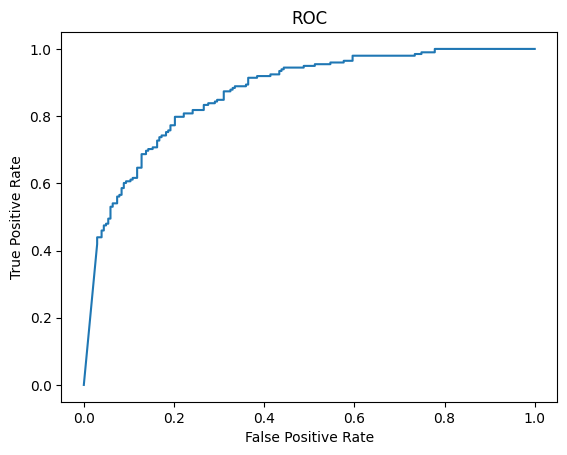

In [ ]:
# plotting the ROC curve
%matplotlib inline
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC')
plt.plot(false_positive_rate, true_positive_rate)